<a href="https://colab.research.google.com/github/ErfanZakeri/Artificial-Intelligence/blob/main/Q2P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1.2

In [1]:
from google.colab import files

uploaded = files.upload()


Saving weather_prediction_bbq_labels.csv.xlsx to weather_prediction_bbq_labels.csv.xlsx
Saving weather_prediction_dataset.csv.xlsx to weather_prediction_dataset.csv.xlsx


In [2]:
import pandas as pd

# خواندن فایل اکسل آپلود شده
df = pd.read_excel("weather_prediction_dataset.csv.xlsx")

# لیست شهرهای فرانسوی
french_cities = ["TOURS", "PERPIGNAN", "MONTELIMAR"]

# نگه‌داشتن فقط ستون‌های مربوط به فرانسه + تاریخ
columns_to_keep = ['DATE', 'MONTH']
columns_to_keep += [col for col in df.columns if any(city in col for city in french_cities)]

# ساخت دیتافریم نهایی
df_french_only = df[columns_to_keep]

# نمایش خلاصه‌ای از خروجی
df_french_only.head()


,DATE,MONTH,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,...,PERPIGNAN_temp_min,PERPIGNAN_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,3.8,0.85,1.0269,0.30,0.0,5.5,2.5,8.5,...,10.3,14.0,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,5.8,0.82,1.0287,0.54,0.0,8.3,6.8,9.8,...,5.1,14.6,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,0.4,0.92,1.0316,0.53,0.0,3.2,-2.1,8.5,...,4.1,13.2,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,1.1,0.85,1.0274,0.64,0.0,7.2,2.3,12.1,...,4.3,12.8,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,3.4,0.82,1.0234,0.70,0.0,8.2,1.5,14.8,...,3.6,14.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


3.1.2

In [3]:
print("تعداد ردیف‌ها (نمونه‌ها):", df_french_only.shape[0])


تعداد ردیف‌ها (نمونه‌ها): 3654


In [4]:
# تبدیل امن ستون DATE به datetime
df_french_only.loc[:, 'DATE'] = pd.to_datetime(df_french_only['DATE'], format='%Y%m%d')

# چاپ بازه زمانی
start_date = df_french_only['DATE'].min()
end_date = df_french_only['DATE'].max()

print("بازه زمانی داده‌ها:", start_date.date(), "تا", end_date.date())


بازه زمانی داده‌ها: 2000-01-01 تا 2010-01-01


<ipython-input-4-1bb0b9b7ea28>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2000-01-01 00:00:00', '2000-01-02 00:00:00', '2000-01-03 00:00:00',
 '2000-01-04 00:00:00', '2000-01-05 00:00:00', '2000-01-06 00:00:00',
 '2000-01-07 00:00:00', '2000-01-08 00:00:00', '2000-01-09 00:00:00',
 '2000-01-10 00:00:00',
 ...
 '2009-12-23 00:00:00', '2009-12-24 00:00:00', '2009-12-25 00:00:00',
 '2009-12-26 00:00:00', '2009-12-27 00:00:00', '2009-12-28 00:00:00',
 '2009-12-29 00:00:00', '2009-12-30 00:00:00', '2009-12-31 00:00:00',
 '2010-01-01 00:00:00']
Length: 3654, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_french_only.loc[:, 'DATE'] = pd.to_datetime(df_french_only['DATE'], format='%Y%m%d')


In [5]:
# جایگزینی مقادیر -9999 با NaN برای پردازش
df_french_only = df_french_only.replace(-9999, pd.NA)

# حذف ستون‌هایی که بیش از 5٪ مقدار گمشده دارن
threshold = 0.95 * df_french_only.shape[0]
df_french_only = df_french_only.dropna(axis=1, thresh=threshold)

# جایگزینی بقیه‌ی مقادیر گمشده با میانگین آن ستون
df_french_only = df_french_only.fillna(df_french_only.mean(numeric_only=True))


In [6]:
import pandas as pd
# 🔽 ادامه‌ی کد — اضافه کردن فایل دوم: برچسب‌های BBQ
df_labels = pd.read_excel("weather_prediction_bbq_labels.csv.xlsx")

# 🔽 فیلتر فقط برچسب‌های مربوط به شهرهای فرانسه
label_columns = ['DATE'] + [col for col in df_labels.columns if any(city in col for city in ["TOURS", "PERPIGNAN", "MONTELIMAR"])]
df_labels_fr = df_labels[label_columns].copy()

# 🔽 تبدیل ستون DATE به datetime
df_labels_fr['DATE'] = pd.to_datetime(df_labels_fr['DATE'], format='%Y%m%d')

# 🔽 ادغام داده‌های هوا با برچسب‌ها روی DATE
df_merged = pd.merge(df_french_only, df_labels_fr, on='DATE', how='inner')

# 🔽 اضافه کردن ستون YEAR و SEASON برای فیلتر سال‌ها
df_merged['YEAR'] = df_merged['DATE'].dt.year
df_merged['SEASON'] = df_merged['DATE'].dt.month % 12 // 3 + 1

# 🔽 نمایش نهایی برای بررسی
print("✅ df_merged ساخته شد.")
print("شکل نهایی:", df_merged.shape)
df_merged.head()


✅ df_merged ساخته شد.
شکل نهایی: (3654, 31)


,DATE,MONTH,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,...,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,MONTELIMAR_BBQ_weather,PERPIGNAN_BBQ_weather,TOURS_BBQ_weather,YEAR,SEASON
0,2000-01-01,1,3.8,0.85,1.0269,0.30,0.0,5.5,2.5,8.5,...,0.25,0.04,8.5,7.2,9.8,False,False,False,2000,1
1,2000-01-02,1,5.8,0.82,1.0287,0.54,0.0,8.3,6.8,9.8,...,0.17,0.16,7.9,6.6,9.2,False,False,False,2000,1
2,2000-01-03,1,0.4,0.92,1.0316,0.53,0.0,3.2,-2.1,8.5,...,0.27,0.00,8.1,6.6,9.6,False,False,False,2000,1
3,2000-01-04,1,1.1,0.85,1.0274,0.64,0.0,7.2,2.3,12.1,...,0.11,0.44,8.6,6.4,10.8,False,False,False,2000,1
4,2000-01-05,1,3.4,0.82,1.0234,0.70,0.0,8.2,1.5,14.8,...,0.39,0.04,8.0,6.4,9.5,False,False,False,2000,1


In [7]:
import numpy as np

# 1. تعریف طول پنجره زمانی
window_size = 5

# 2. جدا کردن داده‌های سال 2009 و 2010
train_df = df_merged[df_merged['YEAR'] == 2009].reset_index(drop=True)
test_df  = df_merged[df_merged['YEAR'] == 2010].reset_index(drop=True)

# 3. تعیین ستون‌های ویژگی (ویژگی‌های آب‌وهوایی فقط)
weather_features = [
    col for col in df_merged.columns
    if any(city in col for city in french_cities) and '_BBQ' not in col
]

# 4. دیکشنری ستون برچسب BBQ برای هر شهر
label_columns = {
    "TOURS": "TOURS_BBQ_weather",
    "PERPIGNAN": "PERPIGNAN_BBQ_weather",
    "MONTELIMAR": "MONTELIMAR_BBQ_weather"
}

# 5. تابع ساخت پنجره زمانی X و y
def build_windows(df, label_col):
    X, y = [], []
    for i in range(window_size, len(df)):
        # X: پنجره ۵ روزه قبل از روز فعلی
        x_window = df.iloc[i - window_size:i][weather_features].to_numpy()
        # y: برچسب BBQ روز فعلی
        label = df.iloc[i][label_col]
        X.append(x_window)
        y.append(label)
    return np.array(X), np.array(y)

# 6. ساخت داده برای هر شهر
data_by_city = {}

for city, label_col in label_columns.items():
    X_train, y_train = build_windows(train_df, label_col)
    X_test, y_test = build_windows(test_df, label_col)

    data_by_city[city] = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
    }

# 7. نمایش شکل نهایی داده برای اطمینان
for city in data_by_city:
    print(f"\n📍 {city}")
    print("X_train shape:", data_by_city[city]['X_train'].shape)
    print("y_train shape:", data_by_city[city]['y_train'].shape)
    print("X_test shape :", data_by_city[city]['X_test'].shape)
    print("y_test shape :", data_by_city[city]['y_test'].shape)




📍 TOURS
X_train shape: (360, 5, 24)
y_train shape: (360,)
X_test shape : (0,)
y_test shape : (0,)

📍 PERPIGNAN
X_train shape: (360, 5, 24)
y_train shape: (360,)
X_test shape : (0,)
y_test shape : (0,)

📍 MONTELIMAR
X_train shape: (360, 5, 24)
y_train shape: (360,)
X_test shape : (0,)
y_test shape : (0,)


3.2

In [8]:
import numpy as np

# تعریف پنجره زمانی
window_size = 5

# جدا کردن سال‌ها
train_df = df_merged[df_merged['YEAR'] == 2008].reset_index(drop=True)
test_df = df_merged[df_merged['YEAR'] == 2009].reset_index(drop=True)

# انتخاب ستون‌های ویژگی عددی (بدون BBQ)
weather_features = [
    col for col in df_merged.columns
    if any(city in col for city in ["TOURS", "PERPIGNAN", "MONTELIMAR"]) and '_BBQ' not in col
]

# تابع ساخت پنجره برای یک شهر (TOURS)
def build_windows(df, label_col):
    X, y = [], []
    for i in range(window_size, len(df)):
        x_window = df.iloc[i - window_size:i][weather_features].to_numpy().flatten()
        label = 1.0 if df.iloc[i][label_col] == True else 0.0  # تبدیل True/False به float
        X.append(x_window)
        y.append(label)
    return np.array(X), np.array(y)

# ساخت داده TOURS
X_train, y_train = build_windows(train_df, "TOURS_BBQ_weather")
X_test, y_test = build_windows(test_df, "TOURS_BBQ_weather")

# نمایش شکل نهایی داده‌ها
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (361, 120)
y_train: (361,)
X_test: (360, 120)
y_test: (360,)


In [9]:
df_labels_fr['YEAR'] = df_labels_fr['DATE'].dt.year
print(df_labels_fr['YEAR'].value_counts().sort_index())


YEAR
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010      1
Name: count, dtype: int64


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# تبدیل داده‌ها به Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# تعریف شبکه عصبی ساده
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)  # خروجی بدون activation (خام)
        )

    def forward(self, x):
        return self.model(x)

# ساخت مدل
input_size = X_train_tensor.shape[1]  # یعنی 120
hidden_size = 64
model = NeuralNet(input_size, hidden_size)

# تعریف تابع خطا و بهینه‌ساز
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-8)


In [11]:
num_epochs = 200
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # محاسبه خطای تست (بدون backprop)
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
        test_losses.append(test_loss.item())

    if epoch % 20 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch+1}/{num_epochs} → Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")


Epoch 1/200 → Train Loss: 0.3017 | Test Loss: 0.4650
Epoch 21/200 → Train Loss: 0.3269 | Test Loss: 0.3911
Epoch 41/200 → Train Loss: 0.3159 | Test Loss: 0.3791
Epoch 61/200 → Train Loss: 0.3054 | Test Loss: 0.3677
Epoch 81/200 → Train Loss: 0.2946 | Test Loss: 0.3565
Epoch 101/200 → Train Loss: 0.2702 | Test Loss: 0.3299
Epoch 121/200 → Train Loss: 0.1558 | Test Loss: 0.1690
Epoch 141/200 → Train Loss: 0.1541 | Test Loss: 0.1652
Epoch 161/200 → Train Loss: 0.1530 | Test Loss: 0.1642
Epoch 181/200 → Train Loss: 0.1521 | Test Loss: 0.1633
Epoch 200/200 → Train Loss: 0.1513 | Test Loss: 0.1627


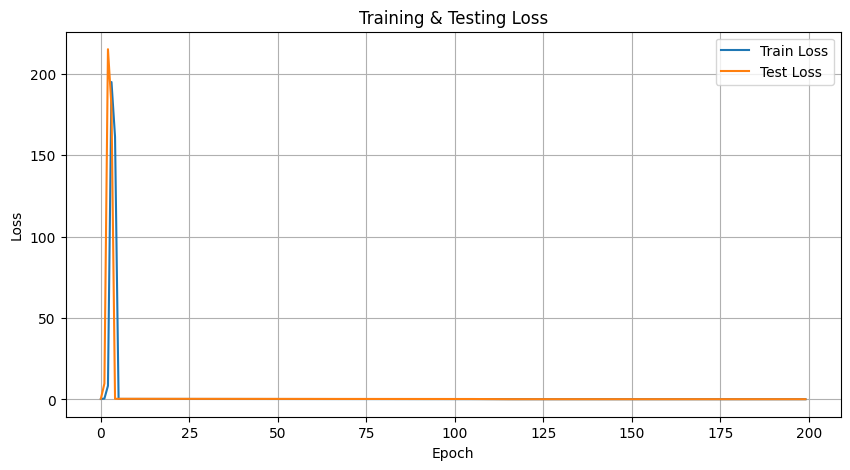

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Testing Loss")
plt.legend()
plt.grid(True)
plt.show()


4.2

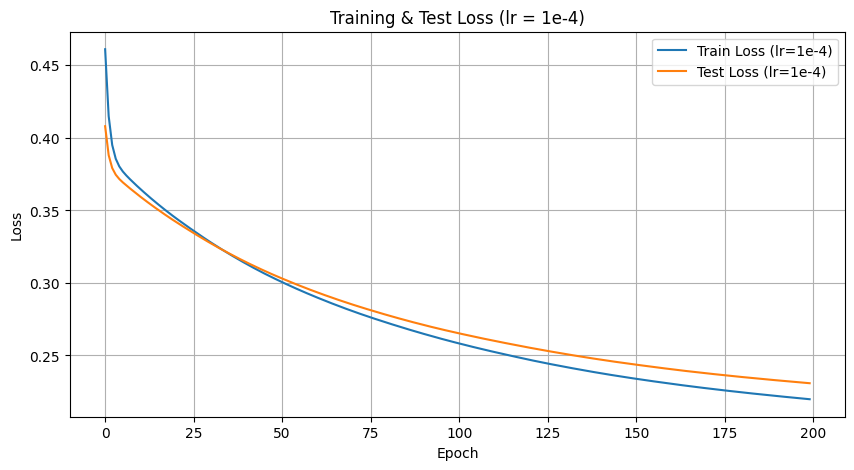

In [13]:
# 1. تعریف مجدد مدل (هر بار مدل جدید باشه)
model_lr4 = NeuralNet(input_size, hidden_size)

# 2. تابع خطا و optimizer با lr=1e-4
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_lr4.parameters(), lr=1e-4, weight_decay=1e-8)

# 3. لیست‌های ثبت خطا
train_losses_lr4 = []
test_losses_lr4 = []

# 4. آموزش مدل در 200 epoch
num_epochs = 200

for epoch in range(num_epochs):
    model_lr4.train()
    optimizer.zero_grad()

    y_pred = model_lr4(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses_lr4.append(loss.item())

    model_lr4.eval()
    with torch.no_grad():
        y_test_pred = model_lr4(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
        test_losses_lr4.append(test_loss.item())

# 5. رسم نمودار خطا برای lr = 1e-4
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses_lr4, label='Train Loss (lr=1e-4)')
plt.plot(test_losses_lr4, label='Test Loss (lr=1e-4)')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Test Loss (lr = 1e-4)")
plt.legend()
plt.grid(True)
plt.show()


5.2

Epoch 1/200 → Train Loss: 0.1768 | Test Loss: 0.1560
Epoch 21/200 → Train Loss: 0.1539 | Test Loss: 0.1494
Epoch 41/200 → Train Loss: 0.1484 | Test Loss: 0.1452
Epoch 61/200 → Train Loss: 0.1448 | Test Loss: 0.1438
Epoch 81/200 → Train Loss: 0.1419 | Test Loss: 0.1440
Epoch 101/200 → Train Loss: 0.1402 | Test Loss: 0.1442
Epoch 121/200 → Train Loss: 0.1384 | Test Loss: 0.1451
Epoch 141/200 → Train Loss: 0.1369 | Test Loss: 0.1459
Epoch 161/200 → Train Loss: 0.1352 | Test Loss: 0.1470
Epoch 181/200 → Train Loss: 0.1341 | Test Loss: 0.1477
Epoch 200/200 → Train Loss: 0.1333 | Test Loss: 0.1481


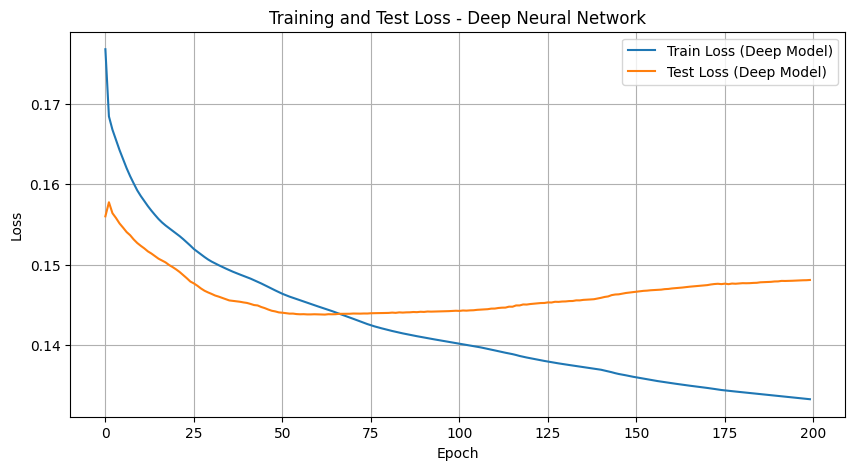

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -----------------------------------
# مرحله 1: تعریف کلاس مدل عمیق‌تر
# -----------------------------------
class DeepNeuralNet(nn.Module):
    def __init__(self, input_size):
        super(DeepNeuralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

# -----------------------------------
# مرحله 2: آماده‌سازی داده‌ها (اگه قبلاً آماده شدن، اینو نزن)
# -----------------------------------
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# -----------------------------------
# مرحله 3: ساخت مدل جدید و تنظیمات آموزش
# -----------------------------------
input_size = X_train_tensor.shape[1]
model_deep = DeepNeuralNet(input_size)

criterion = nn.MSELoss()
optimizer = optim.SGD(model_deep.parameters(), lr=1e-3, weight_decay=1e-8)

# -----------------------------------
# مرحله 4: آموزش مدل
# -----------------------------------
num_epochs = 200
train_losses_deep = []
test_losses_deep = []

for epoch in range(num_epochs):
    model_deep.train()
    optimizer.zero_grad()

    y_pred = model_deep(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses_deep.append(loss.item())

    model_deep.eval()
    with torch.no_grad():
        y_test_pred = model_deep(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
        test_losses_deep.append(test_loss.item())

    if epoch % 20 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch+1}/{num_epochs} → Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")

# -----------------------------------
# مرحله 5: رسم نمودار خطای آموزش و تست
# -----------------------------------
plt.figure(figsize=(10, 5))
plt.plot(train_losses_deep, label="Train Loss (Deep Model)")
plt.plot(test_losses_deep, label="Test Loss (Deep Model)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss - Deep Neural Network")
plt.legend()
plt.grid(True)
plt.show()


emtiazi soal2

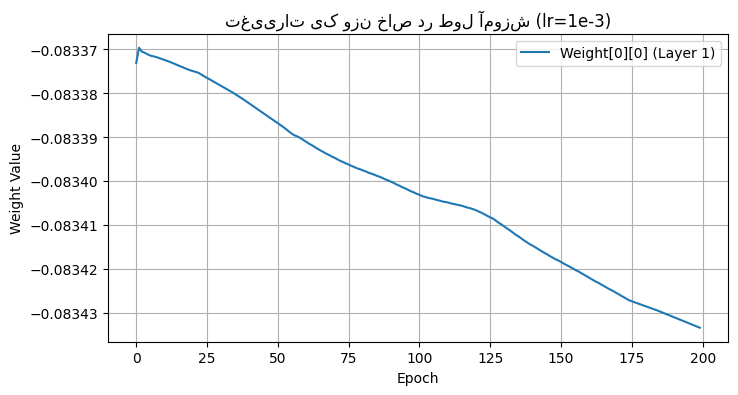

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -----------------------------
# تعریف مدل عمیق‌تر (مدل ۵.۲)
# -----------------------------
class DeepNeuralNet(nn.Module):
    def __init__(self, input_size):
        super(DeepNeuralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

# -----------------------------
# آماده‌سازی داده‌ها (اگر قبلاً آماده کردی اینو رد کن)
# -----------------------------
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# -----------------------------
# ساخت مدل و تعریف loss و optimizer
# -----------------------------
input_size = X_train_tensor.shape[1]
model = DeepNeuralNet(input_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-8)

# -----------------------------
# ذخیره تغییرات وزن (مثلاً اولین وزن لایه اول)
# -----------------------------
weight_history = []

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    # استخراج مقدار وزن خاص (وزن اول از نورون اول لایه اول)
    with torch.no_grad():
        w = model.model[0].weight[0][0].item()
        weight_history.append(w)

# -----------------------------
# رسم نمودار تغییرات وزن
# -----------------------------
plt.figure(figsize=(8, 4))
plt.plot(weight_history, label="Weight[0][0] (Layer 1)")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("تغییرات یک وزن خاص در طول آموزش (lr=1e-3)")
plt.grid(True)
plt.legend()
plt.show()
